In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log
from math import exp
import seaborn as sns
from scipy import stats
from scipy.integrate import solve_ivp

In [7]:
#input dataset
all_covid= pd.read_csv("Datasets/all_covid_data.csv")
all_covid
all_covid= pd.read_csv("Datasets/all_covid_data.csv")
all_covid

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
148594,2021-09-16,ZW,Zimbabwe,AFRO,266,127083,1,4551
148595,2021-09-17,ZW,Zimbabwe,AFRO,285,127368,9,4560
148596,2021-09-18,ZW,Zimbabwe,AFRO,264,127632,2,4562
148597,2021-09-19,ZW,Zimbabwe,AFRO,107,127739,1,4563


In [8]:
#filter out Germany
all_covid= all_covid.drop(["Country_code","WHO_region","New_cases","New_deaths","Cumulative_deaths"],axis= 1,inplace= False)
covid_ger= all_covid.iloc[:,1:3]
covid_ger= covid_ger[(covid_ger.Country == "Germany")]
covid_ger

,Country,Cumulative_cases
48906,Germany,0
48907,Germany,0
48908,Germany,0
48909,Germany,0
48910,Germany,0
...,...,...
49528,Germany,4114856
49529,Germany,4125878
49530,Germany,4134779
49531,Germany,4142116


In [10]:
#reset index
covid_ger.index= np.arange(1, len(covid_ger) +1)
covid_ger

,Country,Cumulative_cases
1,Germany,0
2,Germany,0
3,Germany,0
4,Germany,0
5,Germany,0
...,...,...
623,Germany,4114856
624,Germany,4125878
625,Germany,4134779
626,Germany,4142116


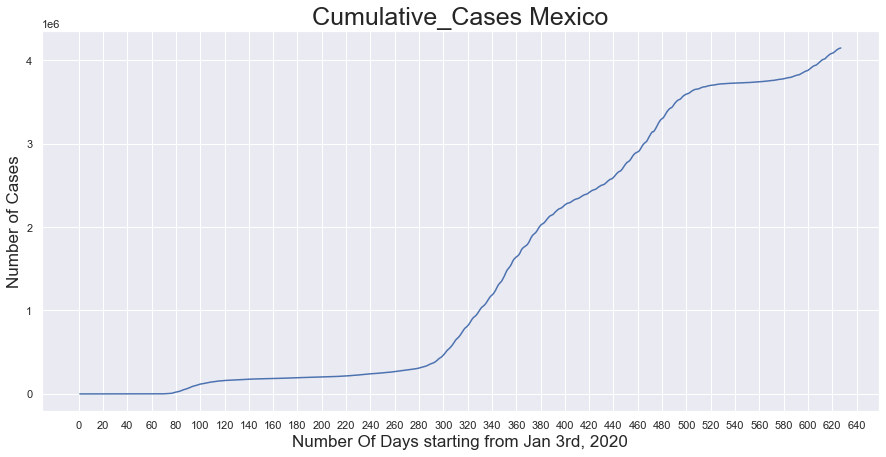

In [11]:
#ploting the cumulative cases
sns.set()
x= range(650)
plt.figure(figsize=(15,7))
plt.plot(covid_ger["Cumulative_cases"])
plt.xticks(np.arange(min(x),max(x)+1,20.0))
plt.xlabel("Number Of Days starting from Jan 3rd, 2020",size = 17)
plt.ylabel("Number of Cases",size=17)
plt.title("Cumulative_Cases Germany", size= 25)
plt.show()

<ipython-input-19-aaaebae8fdbd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_ger100["Normalised_Cumulative"]= covid_ger100["Cumulative_cases"]/pop


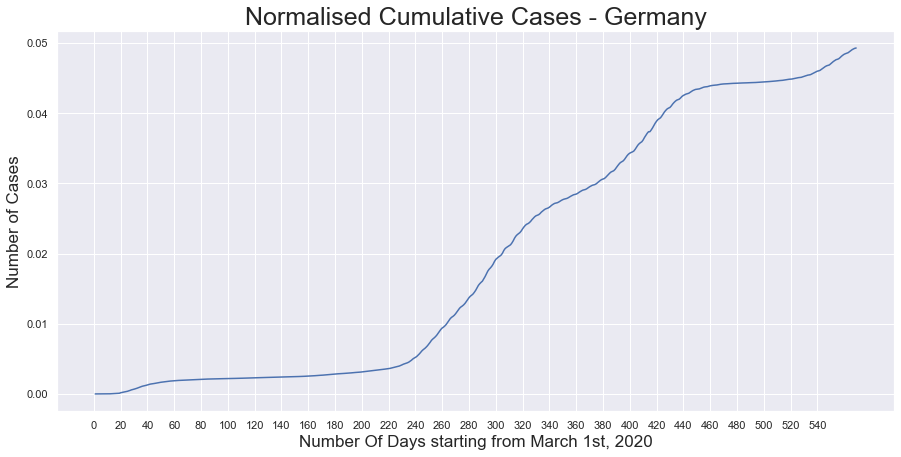

In [19]:
#Cumulative cases from 100
covid_ger100 = covid_ger[(covid_ger["Cumulative_cases"] >= 100)]
covid_ger100.index= np.arange(1, len(covid_ger100) +1)

#normalisng the data
pop= 84137538
covid_ger100["Normalised_Cumulative"]= covid_ger100["Cumulative_cases"]/pop

#ploting normalised data
x= range(560)
plt.figure(figsize=(15,7))
plt.plot(covid_ger100["Normalised_Cumulative"])
plt.xticks(np.arange(min(x),max(x)+1,20.0))
plt.xlabel("Number Of Days starting from March 1st, 2020",size = 17)
plt.ylabel("Number of Cases",size=17)
plt.title("Normalised Cumulative Cases - Germany", size= 25)
plt.show()

<ipython-input-20-243d7eacb88c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_ger100["log"]= covid_ger100["Normalised_Cumulative"].apply(lambda x: log(x))


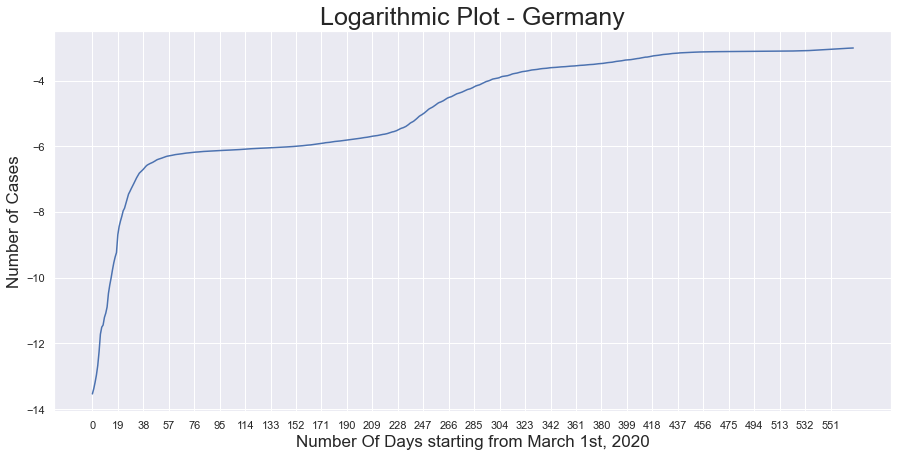

In [20]:
#log of normalised data
covid_ger100["log"]= covid_ger100["Normalised_Cumulative"].apply(lambda x: log(x))

#ploting the log data
x= range(569)
plt.figure(figsize=(15,7))
plt.plot(x, covid_ger100["log"])
plt.xticks(np.arange(min(x), max(x)+1, step= 19.0))
plt.xlabel("Number Of Days starting from March 1st, 2020",size = 17)
plt.ylabel("Number of Cases",size=17)
plt.title("Logarithmic Plot - Germany", size= 25)
plt.show()

In [21]:
#getting Day column for coninience
covid_ger100["Day"]= np.arange(1, len(covid_ger100["Country"])+1)
covid_ger100

<ipython-input-21-26bac1606e24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_ger100["Day"]= np.arange(1, len(covid_ger100["Country"])+1)


,Country,Cumulative_cases,Normalised_Cumulative,log,Day
1,Germany,111,0.000001,-13.538433,1
2,Germany,129,0.000002,-13.388151,2
3,Germany,157,0.000002,-13.191718,3
4,Germany,196,0.000002,-12.969849,4
5,Germany,262,0.000003,-12.679619,5
...,...,...,...,...,...
565,Germany,4114856,0.048906,-3.017849,565
566,Germany,4125878,0.049037,-3.015174,566
567,Germany,4134779,0.049143,-3.013019,567
568,Germany,4142116,0.049230,-3.011246,568


In [22]:
linest= stats.linregress(covid_ger100["Day"][0:39],covid_ger100["log"][0:39])
Emr= linest.slope
Ema= linest.intercept

In [23]:
b=0.1
a= Emr + b
r0= 15/pop
i0= covid_ger100['Normalised_Cumulative'][1] - r0
s0= 1 - i0 - r0

print(a, r0, i0, s0)


0.2898161963194291 1.7827952132376396e-07 1.1409889364720894e-06 0.9999986807315422


In [24]:
def sir(t,y,a,b):
    I= 1- y[0] -y[1]
    dydt =[- a * I * y[0],b * I]
    return dydt
y0= [s0,r0]
t= [1,covid_ger100['Day'].shape[0]]
day= covid_ger100['Day']
mod = solve_ivp(sir, t,y0, args=(a,b), t_eval= day)
    

In [25]:
mod


  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 182
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 14

In [26]:
p= 1- mod.y[0]
p

array([1.31926846e-06, 1.68347295e-06, 2.12400041e-06, 2.65590977e-06,
       3.29855062e-06, 4.07600910e-06, 5.01710789e-06, 6.15540621e-06,
       8.00729893e-06, 1.13920281e-05, 1.57580884e-05, 2.06133379e-05,
       2.55833600e-05, 3.04114637e-05, 3.49586836e-05, 3.92037798e-05,
       4.32432380e-05, 4.72912693e-05, 5.16798105e-05, 5.68585238e-05,
       6.33947971e-05, 7.19737437e-05, 8.33982024e-05, 9.85887377e-05,
       1.18583640e-04, 1.44538923e-04, 1.77728330e-04, 2.19543327e-04,
       2.71493106e-04, 3.35204584e-04, 4.12422404e-04, 5.05008936e-04,
       6.14944273e-04, 7.44666423e-04, 9.01357043e-04, 1.08961864e-03,
       1.31478716e-03, 1.58481367e-03, 1.91026427e-03, 2.30432017e-03,
       2.78277766e-03, 3.36404809e-03, 4.06915791e-03, 4.92174865e-03,
       5.94807690e-03, 7.17996553e-03, 8.65887904e-03, 1.04323886e-02,
       1.25616902e-02, 1.51218752e-02, 1.82019310e-02, 2.19047406e-02,
       2.63470829e-02, 3.16596324e-02, 3.79869593e-02, 4.54875297e-02,
      

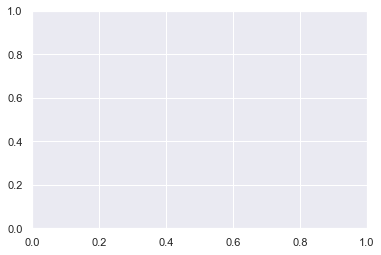

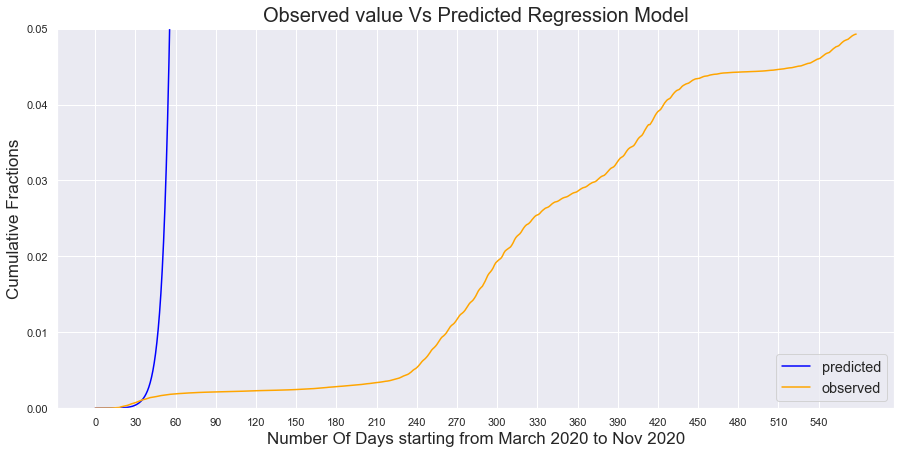

In [30]:
x= range(569)
scale_fact= 10**-1.3
ymin,ymax= plt.ylim()
plt.figure(figsize=(15,7))
plt.plot(x,p,color='blue',label='predicted')
plt.plot(x,covid_ger100["Normalised_Cumulative"],color='orange',label='observed')
plt.xticks(np.arange(min(x),max(x)+1,30.0))
plt.ylim(ymin*scale_fact,ymax*scale_fact)
plt.xlabel("Number Of Days starting from March 2020 to Nov 2020",size = 17)
plt.ylabel("Cumulative Fractions",size=17)
plt.title("Observed value Vs Predicted Regression Model", size= 20)
plt.legend(fontsize="large")
plt.show()


In [36]:
linest= stats.linregress(covid_ger100["Day"][39:221],covid_ger100["log"][39:221])
Emr= linest.slope
Ema= linest.intercept

In [37]:
b=0.1
a= Emr + b
r0= 15/pop
i0= covid_ger100['Normalised_Cumulative'][1] - r0
s0= 1 - i0 - r0

print(a, r0, i0, s0)


0.10393035077495633 1.7827952132376396e-07 1.1409889364720894e-06 0.9999986807315422


In [38]:
def sir(t,y,a,b):
    I= 1- y[0] -y[1]
    dydt =[- a * I * y[0],b * I]
    return dydt
y0= [s0,r0]
t= [1,covid_ger100['Day'].shape[0]]
day= covid_ger100['Day']
mod = solve_ivp(sir, t,y0, args=(a,b), t_eval= day)
    

In [41]:
mod

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 26
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148

In [39]:
p= 1- mod.y[0]
p

array([1.31926846e-06, 1.43808501e-06, 1.55736944e-06, 1.67712358e-06,
       1.79734930e-06, 1.91804843e-06, 2.03922285e-06, 2.16087443e-06,
       2.28300507e-06, 2.40561673e-06, 2.52871129e-06, 2.65229063e-06,
       2.77635666e-06, 2.90091126e-06, 3.02595635e-06, 3.15149385e-06,
       3.27752568e-06, 3.40405378e-06, 3.53108009e-06, 3.65860657e-06,
       3.78663518e-06, 3.91516789e-06, 4.04420666e-06, 4.17375350e-06,
       4.30381040e-06, 4.43437936e-06, 4.56546239e-06, 4.69706151e-06,
       4.82917875e-06, 4.96181615e-06, 5.09497576e-06, 5.22865963e-06,
       5.36286982e-06, 5.49760841e-06, 5.63287748e-06, 5.76867910e-06,
       5.90501539e-06, 6.04188845e-06, 6.17930039e-06, 6.31725334e-06,
       6.45574942e-06, 6.59479077e-06, 6.73437956e-06, 6.87451792e-06,
       7.01520803e-06, 7.15645206e-06, 7.29825219e-06, 7.44061062e-06,
       7.58352954e-06, 7.72701116e-06, 7.87105771e-06, 8.01567139e-06,
       8.16085445e-06, 8.30660913e-06, 8.45293769e-06, 8.59984237e-06,
      

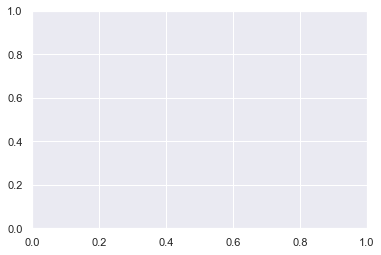

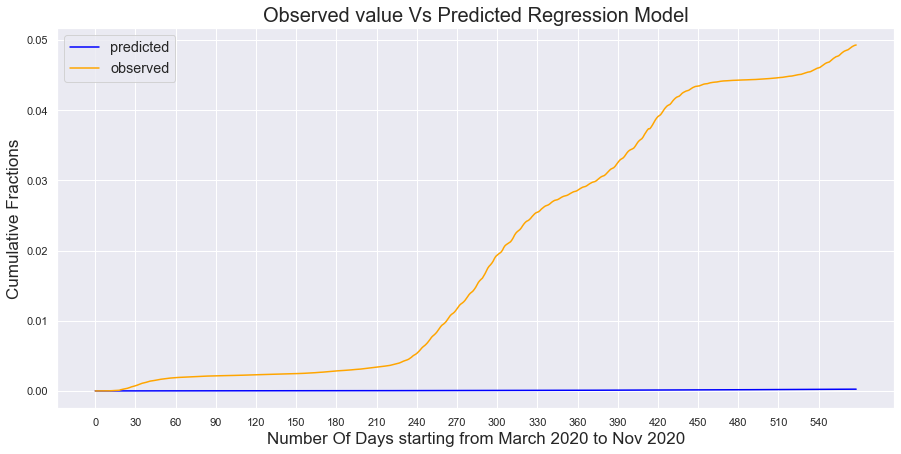

In [44]:
x= range(569)
#scale_fact= 10**-1.5
ymin,ymax= plt.ylim()
plt.figure(figsize=(15,7))
plt.plot(x,p,color='blue',label='predicted')
plt.plot(x,covid_ger100["Normalised_Cumulative"],color='orange',label='observed')
plt.xticks(np.arange(min(x),max(x)+1,30.0))
#plt.ylim(ymin*scale_fact,ymax*scale_fact)
plt.xlabel("Number Of Days starting from March 2020 to Nov 2020",size = 17)
plt.ylabel("Cumulative Fractions",size=17)
plt.title("Observed value Vs Predicted Regression Model", size= 20)
plt.legend(fontsize="large")
plt.show()


In [45]:
linest= stats.linregress(covid_ger100["Day"][0:221],covid_ger100["log"][0:221])
Emr= linest.slope
Ema= linest.intercept

In [46]:
b=0.1
a= Emr + b
r0= 15/pop
i0= covid_ger100['Normalised_Cumulative'][1] - r0
s0= 1 - i0 - r0

print(a, r0, i0, s0)


0.11618895086889394 1.7827952132376396e-07 1.1409889364720894e-06 0.9999986807315422


In [47]:
def sir(t,y,a,b):
    I= 1- y[0] -y[1]
    dydt =[- a * I * y[0],b * I]
    return dydt
y0= [s0,r0]
t= [1,covid_ger100['Day'].shape[0]]
day= covid_ger100['Day']
mod = solve_ivp(sir, t,y0, args=(a,b), t_eval= day)
    

In [48]:
p= 1- mod.y[0]
p

array([1.31926846e-06, 1.45291747e-06, 1.58874771e-06, 1.72679474e-06,
       1.86709473e-06, 2.00968445e-06, 2.15460129e-06, 2.30188322e-06,
       2.45157666e-06, 2.60373680e-06, 2.75839909e-06, 2.91559919e-06,
       3.07537381e-06, 3.23776073e-06, 3.40279882e-06, 3.57052799e-06,
       3.74098925e-06, 3.91422465e-06, 4.09027733e-06, 4.26919149e-06,
       4.45101240e-06, 4.63578642e-06, 4.82356095e-06, 5.01438447e-06,
       5.20830654e-06, 5.40537778e-06, 5.60564987e-06, 5.80917559e-06,
       6.01600875e-06, 6.22620427e-06, 6.43981811e-06, 6.65690731e-06,
       6.87752998e-06, 7.10174531e-06, 7.32961353e-06, 7.56119596e-06,
       7.79655501e-06, 8.03575411e-06, 8.27885781e-06, 8.52593169e-06,
       8.77704243e-06, 9.03225776e-06, 9.29164649e-06, 9.55527849e-06,
       9.82322471e-06, 1.00955572e-05, 1.03723489e-05, 1.06536742e-05,
       1.09396081e-05, 1.12302271e-05, 1.15256083e-05, 1.18258304e-05,
       1.21309728e-05, 1.24411160e-05, 1.27563418e-05, 1.30767327e-05,
      

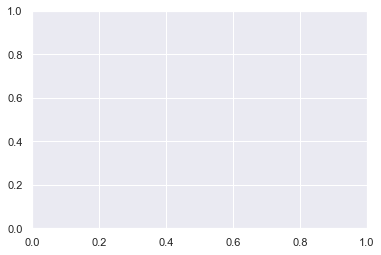

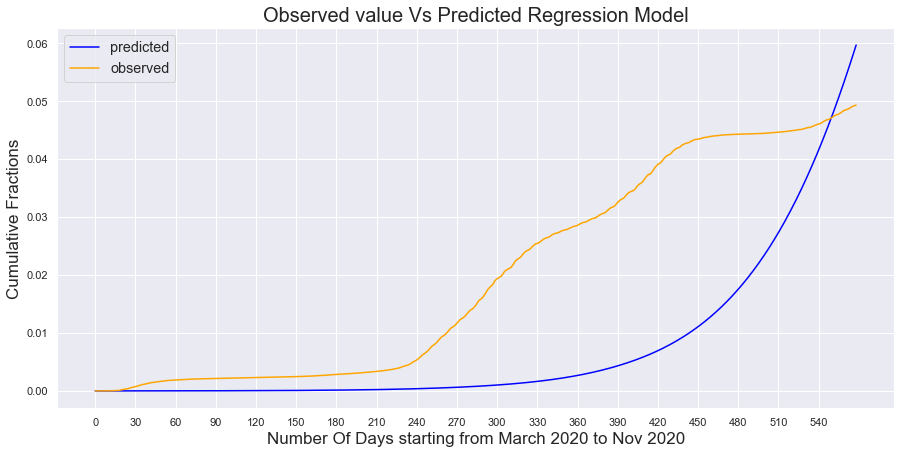

In [54]:
x= range(569)
#scale_fact= 10**-1.3
ymin,ymax= plt.ylim()
plt.figure(figsize=(15,7))
plt.plot(x,p,color='blue',label='predicted')
plt.plot(x,covid_ger100["Normalised_Cumulative"],color='orange',label='observed')
plt.xticks(np.arange(min(x),max(x)+1,30.0))
#plt.ylim(ymin*scale_fact,ymax*scale_fact)
plt.xlabel("Number Of Days starting from March 2020 to Nov 2020",size = 17)
plt.ylabel("Cumulative Fractions",size=17)
plt.title("Observed value Vs Predicted Regression Model", size= 20)
plt.legend(fontsize="large")
plt.show()


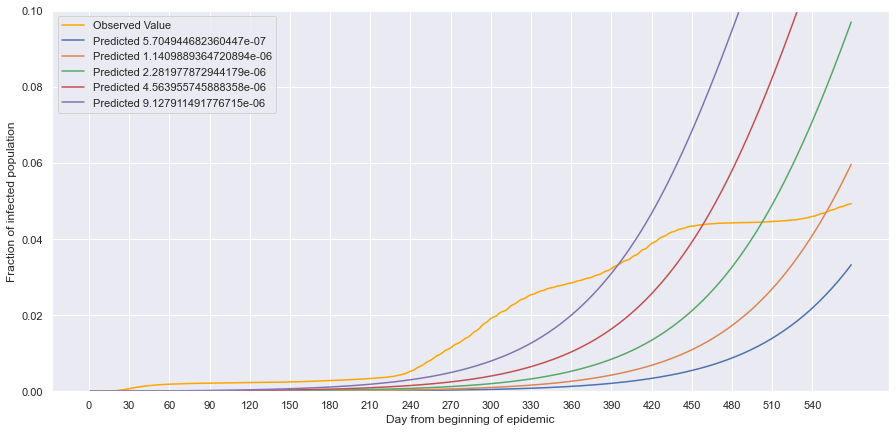

In [63]:
i00= i0 /2
scale_fact= 10**-1
plt.figure(figsize=(15,7))
plt.plot(covid_ger100["Normalised_Cumulative"],color='orange',label='Observed Value')
plt.ylim(ymin*scale_fact,ymax*scale_fact)
x= range(569)
plt.xticks(np.arange(min(x),max(x)+1,30.0))
for i in range(0,5):
    s0= 1- i00 -r0
    y0= [s0,r0]
    mod = solve_ivp(sir, t,y0, args=(a,b), t_eval= day)
    p= 1- mod.y[0]
    plt.plot(covid_ger100['Day'], p, label = ('Predicted ' + str(i00)))
    plt.xlabel('Day from beginning of epidemic')
    plt.ylabel('Fraction of infected population')
    plt.legend()
    i00 = i00 * 2
plt.show()